<a href="https://cognitiveclass.ai"><img src = "https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/Logos/organization_logo/organization_logo.png" width = 400> </a>

<h1 align=center><font size = 5>Peer Review Final Assignment</font></h1>

## Introduction


In this lab, you will build an image classifier using the VGG16 pre-trained model, and you will evaluate it and compare its performance to the model we built in the last module using the ResNet50 pre-trained model. Good luck!

## Table of Contents

<div class="alert alert-block alert-info" style="margin-top: 20px">

<font size = 3>    

1. <a href="#item41">Download Data 
2. <a href="#item42">Part 1</a>
3. <a href="#item43">Part 2</a>  
4. <a href="#item44">Part 3</a>  

</font>
    
</div>

<a id="item41"></a>

## Download Data

Use the <code>skillsnetwork</code> module to download the data for this assignment from here: https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DL0321EN/data/concrete_data_week4.zip

Use the following cell to download the data.

In [1]:
!pip -q install skillsnetwork

In [3]:
import os
import numpy as np
import matplotlib.pyplot as plt
import skillsnetwork
import keras
from keras.models import Sequential, load_model
from keras.layers import Dense
from keras.applications import ResNet50, VGG16
from keras.applications.resnet50 import preprocess_input
from keras.preprocessing.image import ImageDataGenerator

In [4]:
await skillsnetwork.prepare("https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DL0321EN/data/concrete_data_week4.zip", path="/kaggle/working", overwrite=True, verbose=False)

  0%|          | 0/80045 [00:00<?, ?it/s]

After you unzip the data, you fill find the data has already been divided into a train, validation, and test sets.

## Part 1

In this part, you will design a classifier using the VGG16 pre-trained model. Just like the ResNet50 model, you can import the model <code>VGG16</code> from <code>keras.applications</code>.

You will essentially build your classifier as follows:
1. Import libraries, modules, and packages you will need. Make sure to import the *preprocess_input* function from <code>keras.applications.vgg16</code>.
2. Use a batch size of 100 images for both training and validation.
3. Construct an ImageDataGenerator for the training set and another one for the validation set. VGG16 was originally trained on 224 × 224 images, so make sure to address that when defining the ImageDataGenerator instances.
4. Create a sequential model using Keras. Add VGG16 model to it and dense layer.
5. Compile the model using the adam optimizer and the categorical_crossentropy loss function.
6. Fit the model on the augmented data using the ImageDataGenerators.

In [5]:
# instantiate your image data generator
data_generator = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    rescale=1./255
)
# train generator
train_generator = data_generator.flow_from_directory(
    "/kaggle/working/concrete_data_week4/train",
    target_size=(224, 224),
    batch_size=100,
    class_mode='categorical',
    )
# validation generator
validation_generator = data_generator.flow_from_directory(
    "/kaggle/working/concrete_data_week4/valid",
    target_size=(224, 224),
    batch_size=100,
    class_mode='categorical',
    )

Found 30001 images belonging to 2 classes.
Found 9501 images belonging to 2 classes.


In [19]:
resnet50_backup = '/kaggle/working/models/classifier_resnet50_model.keras'
if os.path.exists(resnet50_backup):
    #Load model if exists
    model_resnet50 = load_model(resnet50_backup)
else:
    # Build ResNet50 pretrained model
    model_resnet50 = Sequential()
    model_resnet50.add(ResNet50(
        include_top=False,
        pooling='avg',
        weights='imagenet',
        ))
    model_resnet50.add(Dense(2, activation='softmax'))
    model_resnet50.layers[0].trainable = False
    model_resnet50.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model_resnet50.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 2048)              23587712  
                                                                 
 dense (Dense)               (None, 2)                 4098      
                                                                 
Total params: 23591810 (90.00 MB)
Trainable params: 4098 (16.01 KB)
Non-trainable params: 23587712 (89.98 MB)
_________________________________________________________________


In [18]:
vgg16_backup = '/kaggle/working/models/classifier_vgg16_model.keras'
if os.path.exists(vgg16_backup):
    #Load model if exists
    model_vgg16 = load_model(vgg16_backup)
else:
    # Build VGG16 pretrained model
    model_vgg16 = Sequential()
    model_vgg16.add(VGG16(
        include_top=False,
        pooling='avg',
        weights='imagenet',
        ))
    model_vgg16.add(Dense(2, activation='softmax'))
    model_vgg16.layers[0].trainable = False
    model_vgg16.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model_vgg16.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 512)               14714688  
                                                                 
 dense_1 (Dense)             (None, 2)                 1026      
                                                                 
Total params: 14715714 (56.14 MB)
Trainable params: 1026 (4.01 KB)
Non-trainable params: 14714688 (56.13 MB)
_________________________________________________________________


In [9]:
# training models parameters
steps_per_epoch_training = len(train_generator)
steps_per_epoch_validation = len(validation_generator)
num_epochs = 1

In [11]:
# training ResNet50
fit_history_resnet50 = model_resnet50.fit(
    train_generator,
    steps_per_epoch=steps_per_epoch_training,
    epochs=num_epochs,
    validation_data=validation_generator,
    validation_steps=steps_per_epoch_validation,
    verbose=1,
)
# save the model
directorio = os.path.dirname(resnet50_backup)
if not os.path.exists(directorio):
    os.makedirs(directorio)
model_resnet50.save(resnet50_backup)

301/301 [==============================] - 106s 351ms/step - loss: 0.3655 - accuracy: 0.9164 - val_loss: 0.3367 - val_accuracy: 0.8862


In [12]:
# training VGG16
fit_history_vgg16 = model_vgg16.fit(
    train_generator,
    steps_per_epoch=steps_per_epoch_training,
    epochs=num_epochs,
    validation_data=validation_generator,
    validation_steps=steps_per_epoch_validation,
    verbose=1,
)
# save the model
directorio = os.path.dirname(vgg16_backup)
if not os.path.exists(directorio):
    os.makedirs(directorio)
model_vgg16.save(vgg16_backup)

301/301 [==============================] - 125s 373ms/step - loss: 0.2570 - accuracy: 0.9607 - val_loss: 0.1212 - val_accuracy: 0.9803


## Part 2

In this part, you will evaluate your deep learning models on a test data. For this part, you will need to do the following:

1. Load your saved model that was built using the ResNet50 model. 
2. Construct an ImageDataGenerator for the test set. For this ImageDataGenerator instance, you only need to pass the directory of the test images, target size, and the **shuffle** parameter and set it to False.
3. Use the **evaluate** method to evaluate your models on the test data, by passing the above ImageDataGenerator as an argument. You can learn more about **evaluate** [here](https://keras.io/models/sequential/).
4. Print the performance of the classifier using the VGG16 pre-trained model.
5. Print the performance of the classifier using the ResNet pre-trained model.


Use the following cells to evaluate your models.

In [14]:
# test generator
test_generator = data_generator.flow_from_directory(
    "/kaggle/working/concrete_data_week4/test",
    target_size=(224, 224),
    class_mode='categorical',
    batch_size=1,
    shuffle=False
    )

Found 500 images belonging to 2 classes.


In [15]:
result_resnet50 = model_resnet50.evaluate(test_generator, steps=len(test_generator))
print(result_resnet50)

500/500 [==============================] - 5s 10ms/step - loss: 0.3122 - accuracy: 0.9080
[0.31221652030944824, 0.9079999923706055]


In [16]:
result_vgg16 = model_vgg16.evaluate(test_generator, steps=len(test_generator))
print(result_vgg16)

500/500 [==============================] - 3s 6ms/step - loss: 16903.4961 - accuracy: 0.5180
[16903.49609375, 0.5180000066757202]


## Part 3

In this model, you will predict whether the images in the test data are images of cracked concrete or not. You will do the following:

1. Use the **predict** method to predict the class of the images in the test data, by passing the test data ImageDataGenerator instance defined in the previous part as an argument. You can learn more about the **predict** method [here](https://keras.io/models/sequential/).
2. Report the class predictions of the first five images in the test set. You should print something list this:

<center>
    <ul style="list-style-type:none">
        <li>Positive</li>  
        <li>Negative</li> 
        <li>Positive</li>
        <li>Positive</li>
        <li>Negative</li>
    </ul>
</center>

Use the following cells to make your predictions.

1/1 [==============================] - 0s 18ms/step


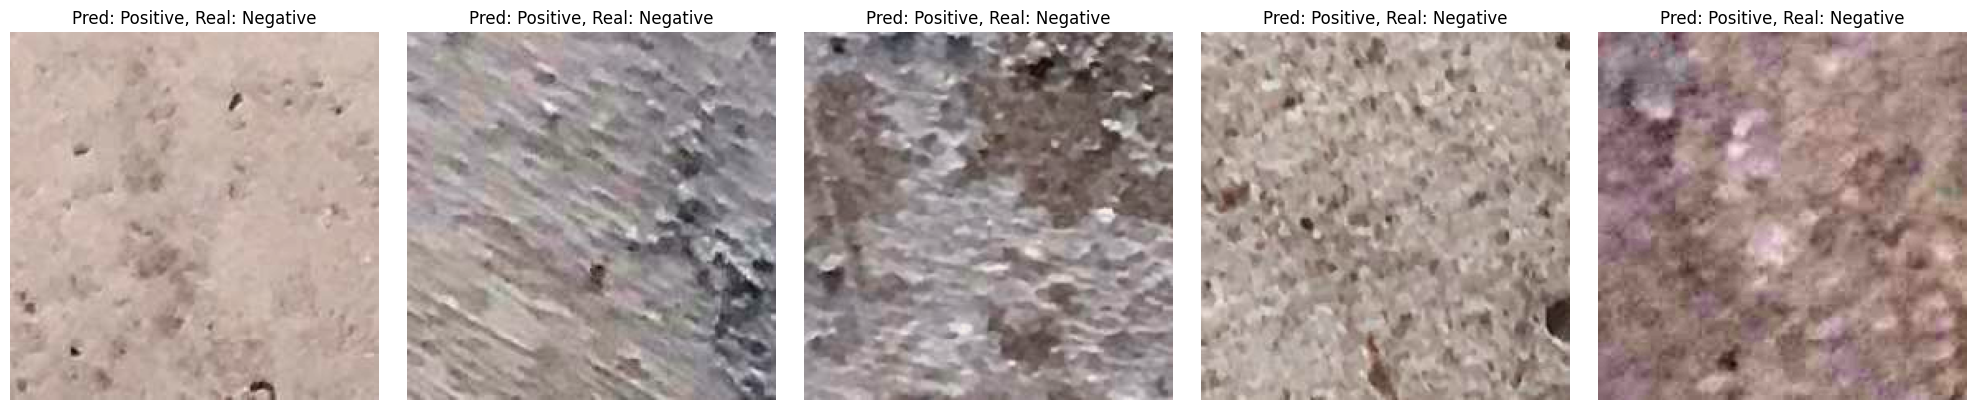

In [17]:
# show images and classes
fig, axes = plt.subplots(1, 5, figsize=(20, 4))
for i, ax in enumerate(axes):
    X_real, y_real = next(test_generator)
    y_hat = model_vgg16.predict(X_real)
    y_real_class = np.argmax(y_real, axis=1)[0]
    y_hat_class = np.argmax(y_hat, axis=1)[0]
    pred = "Positive" if y_hat_class == 1 else "Negative"
    real = "Positive" if y_real_class == 1 else "Negative"
    image = X_real[0]
    image_norm = (image - image.min()) / (image.max() - image.min())
    ax.imshow(image_norm)
    ax.set_title(f'Pred: {pred}, Real: {real}')
    ax.axis('off')
plt.tight_layout()
plt.show()

### Thank you for completing this lab!

This notebook was created by Alex Aklson.

This notebook is part of a course on **Coursera** called *AI Capstone Project with Deep Learning*. If you accessed this notebook outside the course, you can take this course online by clicking [here](https://cocl.us/DL0321EN_Coursera_Week4_LAB1).

<hr>

Copyright &copy; 2020 [IBM Developer Skills Network](https://cognitiveclass.ai/?utm_source=bducopyrightlink&utm_medium=dswb&utm_campaign=bdu). This notebook and its source code are released under the terms of the [MIT License](https://bigdatauniversity.com/mit-license/).